In [46]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

tf.executing_eagerly()

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.8.0


## import the data and analyze the miss data

In [235]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [236]:
np.set_printoptions(threshold=1e6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [238]:
datacsv.tail()

,week_start,AutotraderInventory_FranchiseDealers_Inventory,AutotraderInventory_IndieDealers_Inventory,AutotraderInventory_TotalDealers_Inventory,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_fl

In [240]:
datacsv.describe()

,AutotraderInventory_FranchiseDealers_Inventory,AutotraderInventory_IndieDealers_Inventory,AutotraderInventory_TotalDealers_Inventory,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_flag-precontr

In [241]:
datacsv.isna().sum()

week_start                                              4
AutotraderInventory_FranchiseDealers_Inventory        120
AutotraderInventory_IndieDealers_Inventory            120
AutotraderInventory_TotalDealers_Inventory            120
BrandMedia_Addressable/Linear_Spends                   82
BrandMedia_ConnectedTV_Spends                          82
BrandMedia_Default_Spends                              82
BrandMedia_Display_Spends                              82
BrandMedia_LiveStreamVideo_Spends                      82
BrandMedia_OOH_Spends                                  82
BrandMedia_Radio_Spends                                82
BrandMedia_Social_Spends                               82
BrandMedia_TotalDigitalVideo_Spends                    82
CargurusInventory_AllFranchiseDealers_Inventory       120
CargurusInventory_AllIndieDealers_Inventory           120
CargurusInventory_PayingFranchiseDealers_Inventory    120
CargurusInventory_PayingIndieDealers_Inventory        120
CargurusInvent

 ## Q1 Which Marketing channel is most effective?

In [142]:
## datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [242]:
PerformanceMedia_Display_Leads_mean = datacsv['PerformanceMedia_Display_Leads'].mean()
datacsv['PerformanceMedia_Display_Leads'] = datacsv['PerformanceMedia_Display_Leads'].fillna(PerformanceMedia_Display_Leads_mean)
PerformanceMedia_Display_Visits_mean = datacsv['PerformanceMedia_Display_Visits'].mean()
datacsv['PerformanceMedia_Display_Visits'] = datacsv['PerformanceMedia_Display_Visits'].fillna(PerformanceMedia_Display_Visits_mean)


In [243]:
datacsv['performanceMediaDisplayEffectiveness'] = datacsv['PerformanceMedia_Display_Leads']/datacsv['PerformanceMedia_Display_Visits']
performanceMediaDisplayEffectivenessAvg = datacsv['performanceMediaDisplayEffectiveness'].mean()
performanceMediaDisplayEffectivenessAvg

0.15055153106535357

In [244]:
PerformanceMedia_PaidSearch_Leads_mean = datacsv['PerformanceMedia_PaidSearch_Leads'].mean()
datacsv['PerformanceMedia_PaidSearch_Leads'] = datacsv['PerformanceMedia_PaidSearch_Leads'].fillna(PerformanceMedia_PaidSearch_Leads_mean)
PerformanceMedia_PaidSearch_Visits_mean = datacsv['PerformanceMedia_PaidSearch_Visits'].mean()
datacsv['PerformanceMedia_PaidSearch_Visits'] = datacsv['PerformanceMedia_PaidSearch_Visits'].fillna(PerformanceMedia_PaidSearch_Visits_mean)


In [245]:
# PerformanceMedia_PaidSearch
datacsv['performanceMediaPaidSearchEffectiveness'] = datacsv['PerformanceMedia_PaidSearch_Leads']/datacsv['PerformanceMedia_PaidSearch_Visits']
performanceMediaPaidSearchEffectivenessAvg = datacsv['performanceMediaPaidSearchEffectiveness'].mean()
performanceMediaPaidSearchEffectivenessAvg


0.14844000100421345

In [246]:
PerformanceMedia_Partner_Leads_mean = datacsv['PerformanceMedia_Partner_Leads'].mean()
datacsv['PerformanceMedia_Partner_Leads'] = datacsv['PerformanceMedia_Partner_Leads'].fillna(PerformanceMedia_Partner_Leads_mean)
PerformanceMedia_Partner_Visits_mean = datacsv['PerformanceMedia_Partner_Visits'].mean()
datacsv['PerformanceMedia_Partner_Visits'] = datacsv['PerformanceMedia_Partner_Visits'].fillna(PerformanceMedia_Partner_Visits_mean)


In [247]:
# PerformanceMedia_Partner
datacsv['performanceMediaPartnerEffectiveness'] = datacsv['PerformanceMedia_Partner_Leads']/datacsv['PerformanceMedia_Partner_Visits']
performanceMediaPartnerEffectivenessAvg = datacsv['performanceMediaPartnerEffectiveness'].mean()
performanceMediaPartnerEffectivenessAvg


0.15163843065928528

In [248]:
NonPaid_Apps_Leads_mean = datacsv['NonPaid_Apps_Leads'].mean()
datacsv['NonPaid_Apps_Leads'] = datacsv['NonPaid_Apps_Leads'].fillna(NonPaid_Apps_Leads_mean)
NonPaid_Apps_Visits_mean = datacsv['NonPaid_Apps_Visits'].mean()
datacsv['NonPaid_Apps_Visits'] = datacsv['NonPaid_Apps_Visits'].fillna(NonPaid_Apps_Visits_mean)

In [249]:
datacsv['nonPaidAppsEffectiveness'] = datacsv['NonPaid_Apps_Leads']/datacsv['NonPaid_Apps_Visits']
nonPaidAppsEffectivenessAvg = datacsv['nonPaidAppsEffectiveness'].mean()
nonPaidAppsEffectivenessAvg

0.020718500772375918

In [250]:
NonPaid_Direct_Leads_mean = datacsv['NonPaid_Direct_Leads'].mean()
datacsv['NonPaid_Direct_Leads'] = datacsv['NonPaid_Direct_Leads'].fillna(NonPaid_Direct_Leads_mean)
NonPaid_Direct_Visits_mean = datacsv['NonPaid_Direct_Visits'].mean()
datacsv['NonPaid_Direct_Visits'] = datacsv['NonPaid_Direct_Visits'].fillna(NonPaid_Direct_Visits_mean)

In [251]:
datacsv['nonPaidDirectEffectiveness'] = datacsv['NonPaid_Direct_Leads']/datacsv['NonPaid_Direct_Visits']
nonPaidDirectEffectivenessAvg = datacsv['nonPaidDirectEffectiveness'].mean()
nonPaidDirectEffectivenessAvg

0.01949470993653927

In [252]:
NonPaid_Email_Leads_mean = datacsv['NonPaid_Email_Leads'].mean()
datacsv['NonPaid_Email_Leads'] = datacsv['NonPaid_Email_Leads'].fillna(NonPaid_Email_Leads_mean)
NonPaid_Email_Visits_mean = datacsv['NonPaid_Email_Visits'].mean()
datacsv['NonPaid_Email_Visits'] = datacsv['NonPaid_Email_Visits'].fillna(NonPaid_Email_Visits_mean)

In [254]:
datacsv['nonPaidEmailEffectiveness'] = datacsv['NonPaid_Email_Leads']/datacsv['NonPaid_Email_Visits']
nonPaidEmailEffectivenessAvg = datacsv['nonPaidEmailEffectiveness'].mean()
nonPaidEmailEffectivenessAvg

0.035707201152116064

In [255]:
NonPaid_OtherProperties_Leads_mean = datacsv['NonPaid_OtherProperties_Leads'].mean()
datacsv['NonPaid_OtherProperties_Leads'] = datacsv['NonPaid_OtherProperties_Leads'].fillna(NonPaid_OtherProperties_Leads_mean)
NonPaid_OtherProperties_Visits_mean = datacsv['NonPaid_OtherProperties_Visits'].mean()
datacsv['NonPaid_OtherProperties_Visits'] = datacsv['NonPaid_OtherProperties_Visits'].fillna(NonPaid_OtherProperties_Visits_mean)

In [256]:
datacsv['nonPaidOtherPropertiesEffectiveness'] = datacsv['NonPaid_OtherProperties_Leads']/datacsv['NonPaid_OtherProperties_Visits']
nonPaidOtherPropertiesEffectivenessAvg = datacsv['nonPaidOtherPropertiesEffectiveness'].mean()
nonPaidOtherPropertiesEffectivenessAvg

0.03585984349551162

In [257]:
NonPaid_SEO_Leads_mean = datacsv['NonPaid_SEO_Leads'].mean()
datacsv['NonPaid_SEO_Leads'] = datacsv['NonPaid_SEO_Leads'].fillna(NonPaid_SEO_Leads_mean)
NonPaid_SEO_Visits_mean = datacsv['NonPaid_SEO_Visits'].mean()
datacsv['NonPaid_SEO_Visits'] = datacsv['NonPaid_SEO_Visits'].fillna(NonPaid_SEO_Visits_mean)

In [258]:
datacsv['nonPaidSEOEffectiveness'] = datacsv['NonPaid_SEO_Leads']/datacsv['NonPaid_SEO_Visits']
nonPaidSEOEffectivenessAvg = datacsv['nonPaidSEOEffectiveness'].mean()
nonPaidSEOEffectivenessAvg

0.010610754861693408

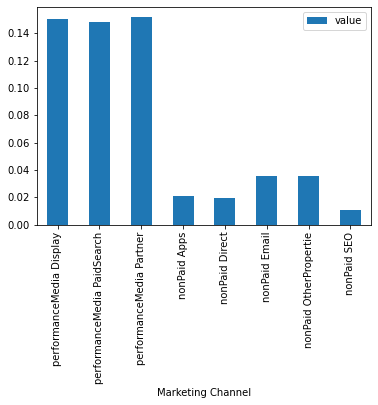

In [261]:
df = pd.DataFrame({'Marketing Channel':['performanceMedia Display', 'performanceMedia PaidSearch', 'performanceMedia Partner', 'nonPaid Apps', 'nonPaid Direct', 'nonPaid Email', 'nonPaid OtherPropertie', 'nonPaid SEO'], 'value':[performanceMediaDisplayEffectivenessAvg, performanceMediaPaidSearchEffectivenessAvg,performanceMediaPartnerEffectivenessAvg, nonPaidAppsEffectivenessAvg, nonPaidDirectEffectivenessAvg, nonPaidEmailEffectivenessAvg, nonPaidOtherPropertiesEffectivenessAvg, nonPaidSEOEffectivenessAvg]})
ax = df.plot.bar(x='Marketing Channel', y='value')


## Q2  What is ROI from each channel?

In [162]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [165]:
totalLeads = datacsv['PerformanceMedia_Display_Leads'][:178].sum() + datacsv['PerformanceMedia_PaidSearch_Leads'][:178].sum() + datacsv['PerformanceMedia_Partner_Leads'][:178].sum()
print(totalLeads)


59143858.77717601


In [166]:
# ROI = revenue / spend = revenue of each channel / spend of each channel
# Channel revenue = Total_DeseasonalizedMarketplace_Revenue * weight of each channel
weightMediaDisplay = datacsv['PerformanceMedia_Display_Leads'][:178].sum() / totalLeads
MediaDisplayRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaDisplay
performanceMediaDisplayROI = MediaDisplayRevenue / datacsv['PerformanceMedia_Display_Spends'][:178].sum()
print(performanceMediaDisplayROI)

5.237647428224605


In [167]:
weightMediaPaidSearch = datacsv['PerformanceMedia_PaidSearch_Leads'][:178].sum() / totalLeads
MediaPaidSearchRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaPaidSearch
performanceMediaPaidSearchROI = MediaPaidSearchRevenue / datacsv['PerformanceMedia_PaidSearch_Spends'][:178].sum()
print(performanceMediaPaidSearchROI)

6.358755363534292


In [168]:
weightMediaPartner = datacsv['PerformanceMedia_Partner_Leads'][:178].sum() / totalLeads
MediaPartnerRevenue = datacsv['Total_DeseasonalizedMarketplace_Revenue'][:178].sum() * weightMediaPartner
performanceMediaPartnerROI = MediaPartnerRevenue / datacsv['PerformanceMedia_Partners_Spends'][:178].sum()
print(performanceMediaPartnerROI)

3.406176274842948


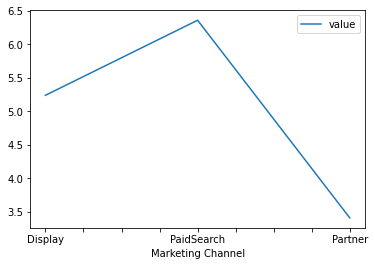

In [170]:
df = pd.DataFrame({'Marketing Channel':['Display', 'PaidSearch', 'Partner'], 'value':[performanceMediaDisplayROI, performanceMediaPaidSearchROI, performanceMediaPartnerROI]})
ax = df.plot.line(x='Marketing Channel', y='value', rot=0)

## Q3 How has the performance of each channel been?

In [171]:
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [172]:
PerformanceMedia_Display_Leads_mean = datacsv['PerformanceMedia_Display_Leads'].mean()
datacsv['PerformanceMedia_Display_Leads'] = datacsv['PerformanceMedia_Display_Leads'].fillna(PerformanceMedia_Display_Leads_mean)
PerformanceMedia_Display_Spends_mean = datacsv['PerformanceMedia_Display_Spends'].mean()
datacsv['PerformanceMedia_Display_Spends'] = datacsv['PerformanceMedia_Display_Spends'].fillna(PerformanceMedia_Display_Spends_mean)


In [174]:
# PerformanceMedia_Display
datacsv['performanceMediaDisplayPerformance'] = datacsv['PerformanceMedia_Display_Spends']/datacsv['PerformanceMedia_Display_Leads']
performanceMediaDisplayPerformanceAvg = datacsv['performanceMediaDisplayPerformance'].mean()
performanceMediaDisplayPerformanceAvg


11.280044856102624

In [175]:
PerformanceMedia_PaidSearch_Spends_mean = datacsv['PerformanceMedia_PaidSearch_Spends'].mean()
datacsv['PerformanceMedia_PaidSearch_Spends'] = datacsv['PerformanceMedia_PaidSearch_Spends'].fillna(PerformanceMedia_PaidSearch_Spends_mean)
PerformanceMedia_PaidSearch_Leads_mean = datacsv['PerformanceMedia_PaidSearch_Leads'].mean()
datacsv['PerformanceMedia_PaidSearch_Leads'] = datacsv['PerformanceMedia_PaidSearch_Leads'].fillna(PerformanceMedia_PaidSearch_Leads_mean)


In [177]:
# PerformanceMedia_PaidSearch
datacsv['performanceMediaPaidSearchPerformance'] = datacsv['PerformanceMedia_PaidSearch_Spends']/datacsv['PerformanceMedia_PaidSearch_Leads']
performanceMediaPaidSearchPerformanceAvg = datacsv['performanceMediaPaidSearchPerformance'].mean()
performanceMediaPaidSearchPerformanceAvg

13.947581774300446

In [178]:
PerformanceMedia_Partners_Spends_mean = datacsv['PerformanceMedia_Partners_Spends'].mean()
datacsv['PerformanceMedia_Partners_Spends'] = datacsv['PerformanceMedia_Partners_Spends'].fillna(PerformanceMedia_Partners_Spends_mean)
PerformanceMedia_Partner_Leads_mean = datacsv['PerformanceMedia_Partner_Leads'].mean()
datacsv['PerformanceMedia_Partner_Leads'] = datacsv['PerformanceMedia_Partner_Leads'].fillna(PerformanceMedia_Partner_Leads_mean)


In [179]:
# PerformanceMedia_Partner
datacsv['performanceMediaPartnerPerformance'] = datacsv['PerformanceMedia_Partners_Spends']/datacsv['PerformanceMedia_Partner_Leads']
performanceMediaPartnerPerformanceAvg = datacsv['performanceMediaPartnerPerformance'].mean()
performanceMediaPartnerPerformanceAvg


11.829266057424173

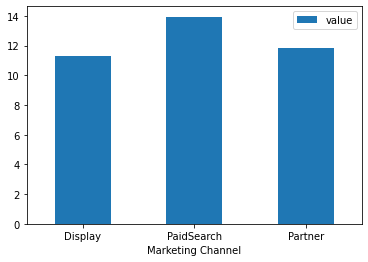

In [262]:
df = pd.DataFrame({'Marketing Channel':['Display', 'PaidSearch', 'Partner'], 'value':[performanceMediaDisplayPerformanceAvg, performanceMediaPaidSearchPerformanceAvg, performanceMediaPartnerPerformanceAvg]})
ax = df.plot.bar(x='Marketing Channel', y='value', rot=0)


## Q5

In [104]:
## 快速测试用
datacsv = pd.read_csv('/Users/bryankan/Code/BUAI445/project/data/The Math Company Project Data Revenue_ADS_v19.csv')

In [108]:
datacsv.isna().sum()

week_start                                            0
AutotraderInventory_FranchiseDealers_Inventory        0
AutotraderInventory_IndieDealers_Inventory            0
AutotraderInventory_TotalDealers_Inventory            0
BrandMedia_Addressable/Linear_Spends                  0
BrandMedia_ConnectedTV_Spends                         0
BrandMedia_Default_Spends                             0
BrandMedia_Display_Spends                             0
BrandMedia_LiveStreamVideo_Spends                     0
BrandMedia_OOH_Spends                                 0
BrandMedia_Radio_Spends                               0
BrandMedia_Social_Spends                              0
BrandMedia_TotalDigitalVideo_Spends                   0
CargurusInventory_AllFranchiseDealers_Inventory       0
CargurusInventory_AllIndieDealers_Inventory           0
CargurusInventory_PayingFranchiseDealers_Inventory    0
CargurusInventory_PayingIndieDealers_Inventory        0
CargurusInventory_TotalAllDealers_Inventory     

In [107]:
datacsv = datacsv.dropna()

In [110]:
datacsv = datacsv.drop('AutotraderInventory_FranchiseDealers_Inventory',axis=1)
datacsv = datacsv.drop('AutotraderInventory_IndieDealers_Inventory',axis=1)
datacsv = datacsv.drop('AutotraderInventory_TotalDealers_Inventory',axis=1)

In [111]:
datacsv.tail()

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,CargurusInventory_AllFranchiseDealers_Inventory,CargurusInventory_AllIndieDealers_Inventory,CargurusInventory_PayingFranchiseDealers_Inventory,CargurusInventory_PayingIndieDealers_Inventory,CargurusInventory_TotalAllDealers_Inventory,CargurusInventory_TotalPayingDealers_Inventory,clientInventory_FranchiseDealers_Inventory,clientInventory_IndieDealers_Inventory,clientInventory_TotalDealers_Inventory,Competitor_CDKGlobal_CostofRevenue,Competitor_CDKGlobal_MarketingandSales,Competitor_CDKGlobal_OperatingExpense,Competitor_CDKGlobal_Revenue,Competitor_CDKWebsite_CostofRevenue,Competitor_CDKWebsite_MarketingandSales,Competitor_CDKWebsite_OperatingExpense,Competitor_CDKWebsite_Revenue,Competitor_CarGurus_CostofRevenue,Competitor_CarGurus_MarketingandSales,Competitor_CarGurus_OperatingExpense,Competitor_CarGurus_Revenue,Competitor_client.com_CostofRevenue,Competitor_client.com_MarketingandSales,Competitor_client.com_OperatingExpense,Competitor_client.com_Revenue,Competitor_TrueCar_CostofRevenue,Competitor_TrueCar_MarketingandSales,Competitor_TrueCar_OperatingExpense,Competitor_TrueCar_Revenue,Macro_Total_Population,Macro_Total_RealDisposablePersonalIncomePerCapita,Macro_Total_TotalVehicleSales,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,RevenueByBusiness_ConversationsDI_Revenue,RevenueByBusiness_FuelFuel_Revenue,RevenueByBusiness_NTMAclient_Revenue,RevenueByBusiness_OnlineShopperDI_Revenue,RevenueByBusiness_Packageclient_Revenue,RevenueByBusiness_Upsellclient_Revenue,RevenueByBusiness_WebsiteDI_Revenue,RevenueByCancel_Field_Revenue,RevenueByCancel_Groups_Revenue,RevenueByCancel_Inside_Revenue,RevenueByMarketplace_Field_Revenue,RevenueByMarketplace_Groups_Revenue,RevenueByMarketplace_Inside_Revenue,RevenueByPackage_Fran_Revenue,RevenueByPackage_Indy_Revenue,RevenueByProduct_DRLegacy_Revenue,RevenueByProduct_NonTraditional_Revenue,RevenueByProduct_Package_Revenue,RevenueByProduct_Upsell_Revenue,RevenueByRetail_DealerInspire_Revenue,RevenueByRetail_Fuel_Revenue,RevenueByRetail_Marketplace_Revenue,RevenueByRetail_OEM_Revenue,RevenueByRetail_Other_Revenue,RevenueBySale_Field_Revenue,RevenueBySale_Groups_Revenue,RevenueBySale_Inside_Revenue,RevenueByTotalWholesale_Amortization_Revenue,RevenueByTotalWholesale_Wholesale_Revenue,RevenueByUpsell_client360_Revenue,RevenueByUpsell_clientSocial_Revenue,RevenueByUpsell_DealerPosition_Revenue,RevenueByUpsell_DealerRaterConnections_Revenue,RevenueByUpsell_EventPositions_Revenue,RevenueByUpsell_NLP_Revenue,RevenueByUpsell_PowerPositions_Revenue,RevenueByUpsell_PreferredTradeIn_Revenue,RevenueByUpsell_Premier_Revenue,RevenueByUpsell_RepairPalCertified_Revenue,RevenueByUpsell_SocialSalesDrive_Revenue,RevenueByUpsell_StandardTradeIn_Revenue,Sales_Promo_Count,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits,Total_Total_flag-covidlockdown1,Total_Total_flag-covidlockdown2,Total_Total_flag-covidpostlockdown,Total_Total_flag-covidpostlockdown2,Total_Total_flag-covidpostlockdown3,Total_Total_flag-covidpostlockdown4,Total_Total_flag-janfeb,Total_Total_flag-monthstart,Total_Total_flag-precontractexpire,Total_Total_flag-pretotalwholesalemonth,Total_Total_flag-stimulus,Total_Total_flag-stimulus2,Total_Total_flag-st

In [78]:
datacsv.pop("week_start")
train_dataset = datacsv.sample(frac=0.8, random_state=0)
test_dataset = datacsv.drop(train_dataset.index)

In [79]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AutotraderInventory_FranchiseDealers_Inventory,60.0,3409.966667,134.987754,3193.0,3338.250000,3387.0000,3453.0000,3783.0000
AutotraderInventory_IndieDealers_Inventory,60.0,1937.716667,118.190896,1791.0,1865.000000,1895.0000,1983.0000,2293.0000
AutotraderInventory_TotalDealers_Inventory,60.0,5347.683333,231.373093,5063.0,5189.000000,5299.0000,5419.2500,5950.0000
BrandMedia_Addressable/Linear_Spends,60.0,78209.089799,120325.233795,0.0,0.000000,53275.9000,99630.7900,545620.8710
BrandMedia_ConnectedTV_Spends,60.0,126633.121557,68198.752849,0.0,86347.907842,112950.3119,161166.3087,290491.0478
...,...,...,...,...,...,...,...,...
Total_Total_trend-week,60.0,141.616667,22.265799,105.0,122.500000,141.0000,160.2500,179.0000
Total_Total_trend-year,60.0,3.300000,0.462125,3.0,3.000000,3.0000,4.0000,4.0000
TruecarInventory_FranchiseDealers_Inventory,60.0,1720.016667,120.976324,1329.0,1635.000000,1712.0000,1780.0000,1994.0000
TruecarInventory_IndieDealers_Inventory,60.0,865.933333,53.476073,663.0,832.000000,852.5000,877.2500,990.0000


In [80]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Total_Total_Visits')
test_labels = test_features.pop('Total_Total_Visits')

In [81]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
AutotraderInventory_FranchiseDealers_Inventory,3409.966667,134.987754
AutotraderInventory_IndieDealers_Inventory,1937.716667,118.190896
AutotraderInventory_TotalDealers_Inventory,5347.683333,231.373093
BrandMedia_Addressable/Linear_Spends,78209.089799,120325.233795
BrandMedia_ConnectedTV_Spends,126633.121557,68198.752849
...,...,...
Total_Total_trend-week,141.616667,22.265799
Total_Total_trend-year,3.300000,0.462125
TruecarInventory_FranchiseDealers_Inventory,1720.016667,120.976324
TruecarInventory_IndieDealers_Inventory,865.933333,53.476073


In [82]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [83]:
normalizer.adapt(np.array(train_features))

In [84]:
print(normalizer.mean.numpy())

[[3.40996680e+03 1.93771655e+03 5.34768311e+03 7.82090859e+04
  1.26633117e+05 4.49821899e+02 1.28759678e+04 2.59683765e+03
  3.06773975e+03 6.69660254e+03 1.91836875e+04 4.70344961e+04
  3.73006665e+03 4.49934961e+03 2.51396680e+03 3.12589990e+03
  8.22958301e+03 5.63995020e+03 2.18771655e+03 2.18771655e+03
  4.37556641e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.39318075e+06 5.07321100e+06 8.47197600e+06
  1.19311090e+07 0.00000000e+00 3.70641150e+06 0.00000000e+00
  1.09802290e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.59572890e+10 1.11288789e+04 3.64030200e+06
  7.27829688e+04 2.52490675e+06 7.53828047e+04 2.82632200e+06
  1.29565029e+04 2.35758219e+05 5.02678828e+04 9.62830750e+05
  3.90805078e+04 2.47226050e+06 2.48741031e+05 2.34203203e+04
  2.29844578e+05 1.45217050e+06 3.47195273e+04 6.33547000e+05
  1.05068025e+06 1.77650293e+04 2.48058172e+05 1.99801531e+05
  8.3757

In [85]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[3.37e+03 1.90e+03 5.27e+03 6.04e+04 1.09e+05 4.27e-01 9.22e+02 0.00e+00
  0.00e+00 7.36e+03 2.30e+04 5.60e+04 3.57e+03 4.15e+03 2.46e+03 3.02e+03
  7.72e+03 5.47e+03 2.20e+03 2.20e+03 4.40e+03 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.30e+06 5.19e+06 8.69e+06
  1.23e+07 0.00e+00 3.98e+06 0.00e+00 1.17e+07 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 7.47e+10 1.10e+04 3.84e+06 5.71e+04 2.43e+06 5.23e+04 2.53e+06
  9.66e+03 1.92e+05 3.69e+04 8.21e+05 3.05e+04 2.32e+06 3.21e+05 1.85e+04
  2.26e+05 1.37e+06 2.86e+04 6.80e+05 1.03e+06 1.71e+04 2.67e+05 2.02e+05
  9.06e+04 4.10e+05 2.90e+05 1.50e+05 5.94e+06 1.40e+06 1.22e+06 3.58e+04
  1.70e+04 1.85e+04 3.83e+06 2.24e+06 1.57e+06 4.82e+06 1.10e+06 8.61e+03
  2.90e+05 5.92e+06 1.40e+06 1.95e+06 4.31e+05 7.64e+06 1.38e+06 1.89e+05
  4.98e+04 2.64e+04 2.20e+04 0.00e+00 0.00e+00 7.61e+04 3.93e+05 7.60e+04
  3.95e+05 2.17e+04 6.87e+04 1.04e+05 7.81e+03 2.55e+05 0.00e+00 6.45e+03
  0.00e+00 2.94e+00 7.9

In [86]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Total_Total_Visits]')
  plt.legend()
  plt.grid(True)

In [87]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 128)              257       
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,738
Trainable params: 12,481
Non-trainable params: 257
_________________________________________________________________


In [90]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=10000)

CPU times: user 3min 5s, sys: 26.1 s, total: 3min 31s
Wall time: 2min 55s


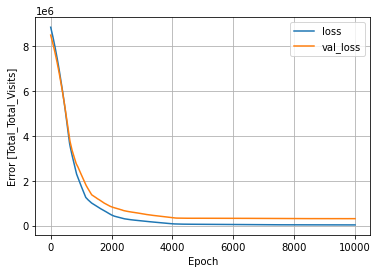

In [91]:
plot_loss(history)

In [92]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)

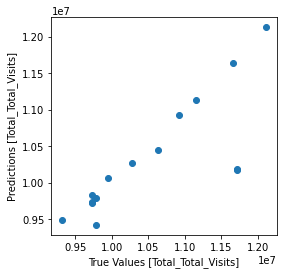

In [93]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Total_Total_Visits]')
plt.ylabel('Predictions [Total_Total_Visits]')
_ = plt.plot()

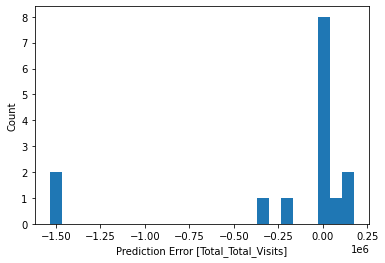

In [94]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Total_Total_Visits]')
_ = plt.ylabel('Count')

In [95]:
dnn_model.save('model')

INFO:tensorflow:Assets written to: dnn_model/assets


#### 新的方法

In [3]:
data2 = pd.read_csv('/Users/bryankan/Code/buai_git_code/445/project/data/data_q5.csv')

In [4]:
data2.isna().sum()

week_start                                 0
BrandMedia_Addressable/Linear_Spends       0
BrandMedia_ConnectedTV_Spends              0
BrandMedia_Default_Spends                  0
BrandMedia_Display_Spends                  0
BrandMedia_LiveStreamVideo_Spends          0
BrandMedia_OOH_Spends                      0
BrandMedia_Radio_Spends                    0
BrandMedia_Social_Spends                   0
BrandMedia_TotalDigitalVideo_Spends        0
NonPaid_Apps_Leads                         4
NonPaid_Apps_Visits                        0
NonPaid_Direct_Leads                       4
NonPaid_Direct_Visits                      0
NonPaid_Email_Leads                        4
NonPaid_Email_Visits                       0
NonPaid_OtherProperties_Leads              4
NonPaid_OtherProperties_Visits             0
NonPaid_SEO_Leads                          4
NonPaid_SEO_Visits                         0
PerformanceMedia_App_Spends                4
PerformanceMedia_Display_Leads             4
Performanc

In [5]:
data2['NonPaid_Apps_Leads'] = data2['NonPaid_Apps_Leads'].fillna(data2['NonPaid_Apps_Leads'].mean())
data2['NonPaid_Direct_Leads'] = data2['NonPaid_Direct_Leads'].fillna(data2['NonPaid_Direct_Leads'].mean())
data2['NonPaid_OtherProperties_Leads'] = data2['NonPaid_OtherProperties_Leads'].fillna(data2['NonPaid_OtherProperties_Leads'].mean())
data2['NonPaid_SEO_Leads'] = data2['NonPaid_SEO_Leads'].fillna(data2['NonPaid_SEO_Leads'].mean())
data2['NonPaid_Email_Leads'] = data2['NonPaid_Email_Leads'].fillna(data2['NonPaid_Email_Leads'].mean())
data2['PerformanceMedia_App_Spends'] = data2['PerformanceMedia_App_Spends'].fillna(data2['PerformanceMedia_App_Spends'].mean())
data2['PerformanceMedia_Display_Leads'] = data2['PerformanceMedia_Display_Leads'].fillna(data2['PerformanceMedia_Display_Leads'].mean())
data2['PerformanceMedia_Display_Spends'] = data2['PerformanceMedia_Display_Spends'].fillna(data2['PerformanceMedia_Display_Spends'].mean())
data2['PerformanceMedia_PaidSearch_Leads'] = data2['PerformanceMedia_PaidSearch_Leads'].fillna(data2['PerformanceMedia_PaidSearch_Leads'].mean())
data2['PerformanceMedia_PaidSearch_Spends'] = data2['PerformanceMedia_PaidSearch_Spends'].fillna(data2['PerformanceMedia_PaidSearch_Spends'].mean())
data2['PerformanceMedia_Partner_Leads'] = data2['PerformanceMedia_Partner_Leads'].fillna(data2['PerformanceMedia_Partner_Leads'].mean())
data2['PerformanceMedia_Partners_Spends'] = data2['PerformanceMedia_Partners_Spends'].fillna(data2['PerformanceMedia_Partners_Spends'].mean())


In [6]:
data2['week_start'] = pd.to_datetime(data2['week_start'])

In [7]:
data2 = data2.sort_values(by = 'week_start')
data2

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits
117,1930-03-20,14063.18710,15584.2345,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,24047.59155,...,1.187646e+06,21235.20430,293889.4181,5.872828e+05,13023.87097,214385.95160,137055.1185,5494217.298,0.900538,8.738211e+06
17,1930-04-18,101070.23400,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,2.139997e+06,760121.47240,733932.9032,5.119455e+06,689498.52380,800032.51610,294901.1559,7796970.725,0.907550,1.444810e+07
30,1930-07-18,356263.75090,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,5.272739e+05,458703.43180,522107.5161,8.046300e+05,56794.29269,276925.25810,376017.9355,7136846.761,1.027674,8.212100e+06
91,1930-09-19,278906.25000,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,1.871504e+06,14911.17634,523417.0609,4.968511e+05,27002.44624,123789.97310,418018.0703,7854563.042,1.036809,9.750161e+06
152,1930-11-20,117604.12540,108745.7144,182.658312,2811.620538,0.0,0.000000,13139.60242,29530.327710,60891.47345,...,1.452983e+06,25787.79677,623141.1645,8.945420e+05,17766.08387,264437.66560,212238.5714,7246200.433,1.061008,9.732218e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2029-03-21,233837.51610,170587.6224,0.000000,47996.126430,0.0,3914.709677,16727.67097,29728.954900,79335.45470,...,1.505552e+06,44773.92473,799679.1826,1.300615e+06,17219.62151,257672.33550,181753.3093,8697367.762,0.900538,1.185112e+07
69,2029-04-19,713763.21350,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,1.022931e+06,23197.13333,742564.1669,6.151682e+05,16684.40430,79349.07097,293937.0441,7713091.850,0.907550,8.730419e+06
130,2029-06-20,0.00000,269249.8651,0.000000,13109.028740,0.0,0.000000,0.00000,4714.841935,38982.38988,...,1.351940e+06,51429.50753,561739.9292,1.135002e+06,22113.64731,304441.04730,179764.5382,7344414.321,0.927119,1.204338e+07
82,2029-07-19,54687.50000,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,...,1.576901e+06,23052.48387,689821.8055,5.611711e+05,23867.22581,115772.12900,414891.4010,7428974.694,1.027674,9.533243e+06


In [8]:
corrMatrix = data2.corr()

In [9]:
corrMatrix.style.background_gradient(cmap='coolwarm')

,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,NonPaid_Apps_Leads,NonPaid_Apps_Visits,NonPaid_Direct_Leads,NonPaid_Direct_Visits,NonPaid_Email_Leads,NonPaid_Email_Visits,NonPaid_OtherProperties_Leads,NonPaid_OtherProperties_Visits,NonPaid_SEO_Leads,NonPaid_SEO_Visits,PerformanceMedia_App_Spends,PerformanceMedia_Display_Leads,PerformanceMedia_Display_Spends,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits
BrandMedia_Addressable/Linear_Spends,1.000000,-0.123858,-0.046009,0.364209,-0.012630,-0.023893,0.204510,0.016452,-0.142860,-0.215978,-0.122828,-0.201716,0.003714,-0.282447,0.016805,-0.290271,0.120485,-0.226919,-0.120299,-0.092603,0.271241,0.134643,-0.106460,0.153952,0.025261,0.050180,0.004447,-0.002994,0.117002,0.055514,-0.005298,-0.030336
BrandMedia_ConnectedTV_Spends,-0.123858,1.000000,0.145105,0.501807,0.246064,0.396781,0.436043,0.619248,0.724320,0.647941,0.859667,0.520389,0.594713,0.780087,0.449861,0.127912,-0.690903,0.720339,0.707161,0.349478,-0.373383,-0.506265,0.097441,-0.371429,-0.135481,-0.147807,-0.153521,-0.060549,-0.675620,0.012231,-0.129334,0.241679
BrandMedia_Default_Spends,-0.046009,0.145105,1.000000,0.081563,0.212230,-0.059853,0.013686,0.398002,0.371163,0.152679,0.167344,0.132667,0.078185,0.245449,0.173359,-0.023539,-0.288161,0.190454,0.119339,0.135347,-0.123938,-0.193337,-0.124009,-0.114039,-0.059698,-0.044272,-0.048800,-0.021181,-0.248097,-0.034553,0.199153,-0.010212
BrandMedia_Display_Spends,0.364209,0.501807,0.081563,1.000000,0.095014,0.164952,0.608836,0.497333,0.382632,0.317772,0.462157,0.240409,0.383303,0.330228,0.171410,0.052736,-0.292514,0.358087,0.404244,0.065097,-0.167891,-0.176982,0.013267,-0.160681,-0.002842,-0.049242,-0.069863,-0.021236,-0.345892,-0.022806,0.014459,0.153661
BrandMedia_LiveStreamVideo_Spends,-0.012630,0.246064,0.212230,0.095014,1.000000,0.203014,0.091468,0.475511,0.155890,0.083743,0.146024,0.069779,-0.002866,0.164351,0.062781,-0.016332,-0.319853,0.115324,0.098250,0.059069,-0.115163,-0.203033,-0.089721,-0.110687,-0.149320,-0.063663,-0.047984,-0.038108,-0.233379,-0.049443,0.046995,-0.036113
BrandMedia_OOH_Spends,-0.023893,0.396781,-0.059853,0.164952,0.203014,1.000000,0.284894,0.321383,0.307303,0.140628,0.270731,0.056437,0.139521,0.101903,-0.114250,-0.006511,-0.236079,0.119153,0.256181,-0.030110,-0.115344,-0.071025,0.064956,-0.116201,0.042666,-0.045074,-0.050761,-0.038711,-0.226034,0.221306,-0.166361,0.079891
BrandMedia_Radio_Spends,0.204510,0.436043,0.013686,0.608836,0.091468,0.284894,1.000000,0.460032,0.410027,0.192141,0.399110,0.084074,0.131129,0.182577,-0.025555,0.003115,-0.326897,0.207831,0.322799,0.226147,-0.187287,-0.152438,0.031203,-0.181311,0.109319,-0.054923,-0.076513,-0.015396,-0.312797,0.097962,0.191139,0.097288
BrandMedia_Social_Spends,0.016452,0.619248,0.398002,0.497333,0.475511,0.321383,0.460032,1.000000,0.763174,0.404451,0.575314,0.301018,0.279680,0.494732,0.189476,-0.005327,-0.664039,0.461213,0.455989,0.345670,-0.312722,-0.400610,-0.060138,-0.296771,-0.098117,-0.118853,-0.126120,-0.048391,-0.594764,0.056338,0.116216,0.092451
BrandMedia_TotalDigitalVideo_Spends,-0.142860,0.724320,0.371163,0.382632,0.155890,0.307303,0.410027,0.763174,1.000000,0.545539,0.751659,0.394581,0.362196,0.636636,0.272546,0.084430,-0.679043,0.579236,0.571332,0.526254,-0.391754,-0.448925,0.133732,-0.386215,0.030401,-0.145463,-0.160118,-0.075732,-0.639509,0.216960,0.006331,0.180299
NonPaid_Apps_Leads,-0.215978,0.647941,0.152679,0.317772,0.083743,0.140628,0.192141,0.404451,0.545539,1.000000,0.803234,0.974070,0.477042,0.91

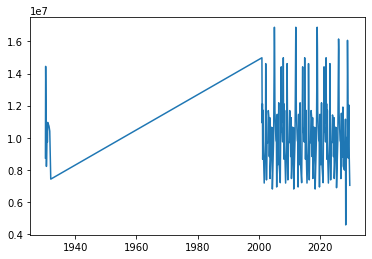

In [10]:
plt.plot(data2['week_start'], data2['Total_Total_Visits'])

In [11]:
indexNames = data2[(data2['week_start'] < '2001-01-01')].index
data2.drop(indexNames , inplace=True)
indexNames = data2[(data2['week_start'] >= '2022-04-18')].index
data2.drop(indexNames , inplace=True)

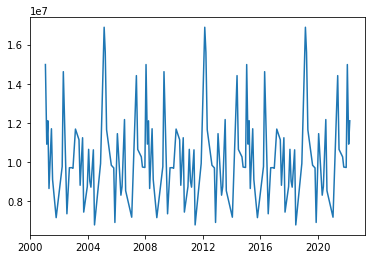

In [12]:
plt.plot(data2['week_start'], data2['Total_Total_Visits'])

In [13]:
data2

,week_start,BrandMedia_Addressable/Linear_Spends,BrandMedia_ConnectedTV_Spends,BrandMedia_Default_Spends,BrandMedia_Display_Spends,BrandMedia_LiveStreamVideo_Spends,BrandMedia_OOH_Spends,BrandMedia_Radio_Spends,BrandMedia_Social_Spends,BrandMedia_TotalDigitalVideo_Spends,...,PerformanceMedia_Display_Visits,PerformanceMedia_PaidSearch_Leads,PerformanceMedia_PaidSearch_Spends,PerformanceMedia_PaidSearch_Visits,PerformanceMedia_Partner_Leads,PerformanceMedia_Partner_Visits,PerformanceMedia_Partners_Spends,Total_DeseasonalizedMarketplace_Revenue,Total_Marketplace_SeasonalIndex,Total_Total_Visits
0,2001-01-18,167802.8978,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,2.207525e+06,355595.76970,1.123133e+06,6.442784e+06,7854.908453,514421.6452,178953.6452,5652935.905,0.966539,1.498443e+07
161,2001-02-21,0.0000,138649.4578,0.000000,3140.466922,0.0,8230.000000,43208.90000,18159.88000,48805.933850,...,1.215280e+06,33405.75000,7.786292e+05,1.202805e+06,17453.250000,275834.2500,197080.9375,7696785.525,1.085156,1.092450e+07
165,2001-03-21,545620.8710,212306.3490,0.000000,111990.961700,0.0,9134.322581,39031.23226,35511.70677,57299.857180,...,1.549750e+06,44326.93548,8.088136e+05,1.316773e+06,16943.161290,261986.5161,181398.0000,7546765.274,1.015958,1.211507e+07
65,2001-04-19,0.0000,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,9.701641e+05,21584.96667,6.026054e+05,5.850640e+05,12776.866670,64593.2000,324861.4833,8045951.364,0.900538,8.660809e+06
126,2001-06-20,0.0000,216146.9084,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,402.616667,...,1.280444e+06,42499.56667,3.682735e+05,9.373061e+05,20251.233330,282899.6333,163002.6417,5625749.570,0.973167,1.170860e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2021-10-19,278906.2500,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,1.891265e+06,14549.16129,5.260024e+05,4.933873e+05,26963.548390,122394.7742,414611.9600,7808686.346,1.036809,9.755095e+06
155,2021-12-20,105673.1516,106479.1024,0.747419,1613.224516,0.0,0.000000,12880.79032,26697.55516,63024.043530,...,1.452586e+06,25063.61290,6.185906e+05,8.787791e+05,17812.064520,266474.8710,212436.8739,7232592.461,1.061008,9.733592e+06
3,2022-01-18,167802.8978,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,2.207525e+06,355595.76970,1.123133e+06,6.442784e+06,7854.908453,514421.6452,178953.6452,5652935.905,0.966539,1.498443e+07
164,2022-02-21,0.0000,138649.4578,0.000000,3140.466922,0.0,8230.000000,43208.90000,18159.88000,48805.933850,...,1.215280e+06,33405.75000,7.786292e+05,1.202805e+06,17453.250000,275834.2500,197080.9375,8221024.251,1.015958,1.092450e+07


In [27]:
data2.pop("week_start")
n = len(data2)
train_df = data2[0:int(n*0.7)]
val_df = data2[int(n*0.7):int(n*0.9)]
test_df = data2[int(n*0.9):]

num_features = data2.shape[1]

In [28]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

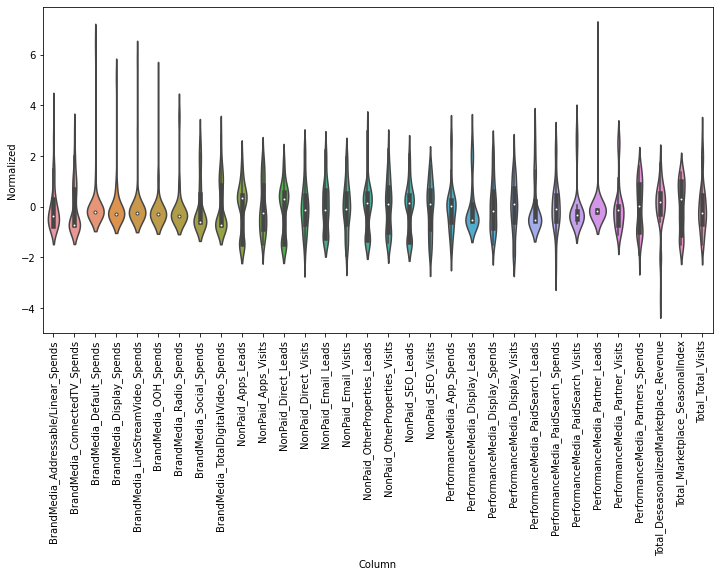

In [31]:
df_std = (data2 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data2.keys(), rotation=90)

In [32]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [33]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [34]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot


In [35]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [36]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [40]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Total_Total_Visits'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Total_Total_Visits']

In [47]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.